<a href="https://colab.research.google.com/github/raiharshit47/test/blob/main/SMS_Spam_classification_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
Files = files.upload()

Saving spam.csv to spam (1).csv


In [ ]:
#!pip install tensorflow-text
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd

In [ ]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis='columns')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df = df.rename(columns={'v1':'Category','v2':'Message'})
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    653  Please call our customer service representativ...    4

In [ ]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
747/4825

0.15481865284974095

In [ ]:
df_spam = df[df['Category']=='spam']
df_spam.shape[0]

747

In [ ]:
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [ ]:
df_ham_downsample = df_ham.sample(df_spam.shape[0])
df_ham_downsample.shape

(747, 2)

In [ ]:
df_balanced = pd.concat([df_spam,df_ham_downsample])
df_balanced.shape

(1494, 2)

In [ ]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [ ]:
df_balanced.sample(5)

,Category,Message
4235,spam,U can WIN å£100 of Music Gift Vouchers every w...
471,ham,"How long has it been since you screamed, princ..."
3394,ham,Then i buy.
3680,ham,LOL what happens in Vegas stays in vegas
4430,ham,2mro i am not coming to gym machan. Goodnight.


In [ ]:
df_balanced['spam'] = df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.head()

,Category,Message,spam
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'], df_balanced['spam'], stratify = df_balanced['spam'])


In [ ]:
X_train.head()

5157                              K k:) sms chat with me.
1833                             When should I come over?
4162                  I told that am coming on wednesday.
557              I know that my friend already told that.
1777    Buy Space Invaders 4 a chance 2 win orig Arcad...
Name: Message, dtype: object

In [ ]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [ ]:
def get_sentence_embedding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  bert_model = bert_encoder(preprocessed_text)
  return bert_model['pooled_output']
 
get_sentence_embedding(["500$ Hurry up", "hey how are you?"])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7971639 , -0.44443443, -0.534763  , ..., -0.20952033,
        -0.70743424,  0.890877  ],
       [-0.93989205, -0.46235067, -0.91754794, ..., -0.7323389 ,
        -0.7653149 ,  0.94863087]], dtype=float32)>

In [ ]:
e = get_sentence_embedding(["banana",
                            "grapes",
                            "mango",
                            "jeff bezos",
                            "elon musk",
                            "bill gates"])

In [ ]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606918 , -0.14219385,  0.4960466 , ...,  0.42165357,
        -0.5322141 ,  0.80312175],
       [-0.86023253, -0.21242964,  0.49156776, ...,  0.39797944,
        -0.6050632 ,  0.8447167 ],
       [-0.7128859 , -0.15463904,  0.3840168 , ...,  0.35278752,
        -0.50991327,  0.73474073],
       [-0.8253345 , -0.3555055 , -0.5906968 , ..., -0.01613718,
        -0.6141757 ,  0.8723029 ],
       [-0.75041324, -0.2681259 , -0.26689574, ...,  0.02839478,
        -0.5938098 ,  0.7974987 ],
       [-0.7854439 , -0.29949722,  0.4102726 , ...,  0.5222532 ,
        -0.4957358 ,  0.8150754 ]], dtype=float32)>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]], [e[1]])

array([[0.99110866]], dtype=float32)

In [ ]:
cosine_similarity([e[3]], [e[4]])

array([[0.98720336]], dtype=float32)

In [ ]:
# BERT Layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural Network

l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)


# Construct a model
model = tf.keras.Model(inputs=[text_input], outputs=[l])


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name="accuracy"),
           tf.keras.metrics.Precision(name="precision"),
           tf.keras.metrics.Recall(name="recall")
]

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = METRICS
)

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
35/35 [==============================] - 449s 13s/step - loss: 0.6721 - accuracy: 0.5804 - precision: 0.5991 - recall: 0.4857
Epoch 2/5
35/35 [==============================] - 445s 13s/step - loss: 0.5432 - accuracy: 0.7866 - precision: 0.7662 - recall: 0.8250
Epoch 3/5
35/35 [==============================] - 442s 13s/step - loss: 0.4633 - accuracy: 0.8473 - precision: 0.8418 - recall: 0.8554
Epoch 4/5
35/35 [==============================] - 443s 13s/step - loss: 0.4139 - accuracy: 0.8580 - precision: 0.8561 - recall: 0.8607
Epoch 5/5
 7/35 [=====>........................] - ETA: 5:58 - loss: 0.4155 - accuracy: 0.8839 - precision: 0.9065 - recall: 0.8584

In [ ]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 171s 13s/step - loss: 0.3334 - accuracy: 0.9118 - precision: 0.8812 - recall: 0.9519


[0.3333512842655182,
 0.9117646813392639,
 0.8811880946159363,
 0.9518716335296631]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[163,  24],
       [  9, 178]])

Text(69.0, 0.5, 'Truth')

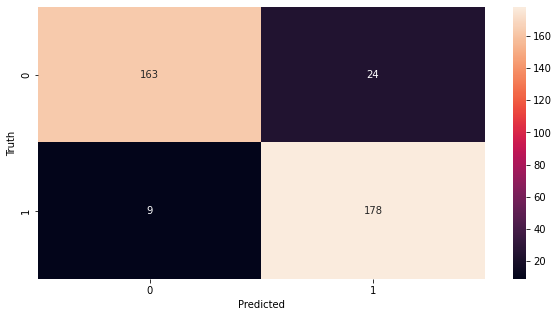

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       187
           1       0.88      0.95      0.92       187

    accuracy                           0.91       374
   macro avg       0.91      0.91      0.91       374
weighted avg       0.91      0.91      0.91       374



In [ ]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

array([[0.74186933],
       [0.75746787],
       [0.74961644],
       [0.32407808],
       [0.20958835]], dtype=float32)